In [7]:
from datasets import load_dataset
import pandas as pd

In [2]:
wiki = load_dataset("wikimedia/wikipedia", "20231101.az")["train"].to_pandas()

In [35]:
raw_datasets = load_dataset("allmalab/azwiki")

In [36]:
raw_datasets['train']

Dataset({
    features: ['id', 'text', 'title'],
    num_rows: 129433
})

In [37]:
from transformers import AutoTokenizer
from datasets import load_dataset

old_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-13b-hf")

def get_training_corpus():
    dataset = raw_datasets["train"]
    for start_idx in range(0, len(dataset), 1000):
        samples = dataset[start_idx : start_idx + 1000]
        yield samples["text"]

training_corpus = get_training_corpus()
tokenizer = old_tokenizer.train_new_from_iterator(training_corpus, 32000)


In [43]:
tokenizer.save_pretrained("azGPT-LLaMA-tokenizer-perplexity")
tokenizer.push_to_hub("azGPT-perplexity")

tokenizer.model: 100%|██████████| 500k/500k [00:01<00:00, 303kB/s]  


CommitInfo(commit_url='https://huggingface.co/eljanmahammadli/azGPT-perplexity/commit/01b109554a69a101a5a40a41dfdcec0384f91e36', commit_message='Upload tokenizer', commit_description='', oid='01b109554a69a101a5a40a41dfdcec0384f91e36', pr_url=None, pr_revision=None, pr_num=None)

In [44]:
df = raw_datasets['train'].to_pandas()

In [48]:
from tqdm import tqdm
tqdm.pandas()
df['token_length'] = df['text'].progress_apply(lambda x: len(tokenizer(x)['input_ids']))

100%|██████████| 129433/129433 [02:53<00:00, 746.41it/s] 


In [49]:
import matplotlib.pyplot as plt

In [55]:
df['token_length'].describe()

count    129433.000000
mean        461.882325
std         905.493551
min          13.000000
25%         110.000000
50%         225.000000
75%         469.000000
max       51099.000000
Name: token_length, dtype: float64

<Axes: ylabel='Frequency'>

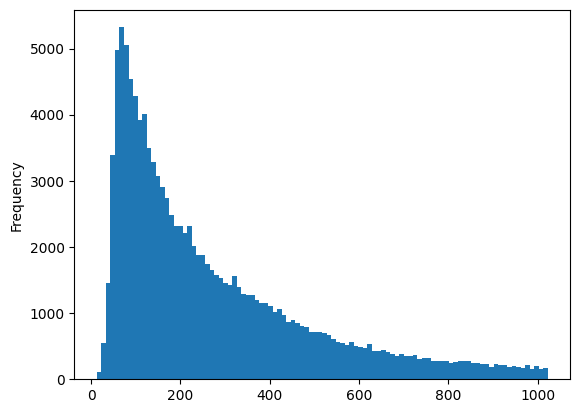

In [56]:
df[df['token_length'] < 1024]['token_length'].plot(kind='hist', bins=100)

In [64]:
df[df['token_length'] < 512].shape[0] / df.shape[0] * 100

77.4756051393385

In [59]:
df.shape

(129433, 4)

In [67]:
tokenizer.voc

32000

In [68]:
from transformers import AutoTokenizer
import math

original_vocab_size = len(tokenizer)

# Calculate the padded vocabulary size (e.g., to the next multiple of 8)
def pad_vocab_size_to_multiple(vocab_size, multiple_of):
    return math.ceil(vocab_size / multiple_of) * multiple_of

padded_vocab_size = pad_vocab_size_to_multiple(original_vocab_size, 8)

print(f"Original Vocabulary Size: {original_vocab_size}")
print(f"Padded Vocabulary Size: {padded_vocab_size}")


Original Vocabulary Size: 32000
Padded Vocabulary Size: 32000
